In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

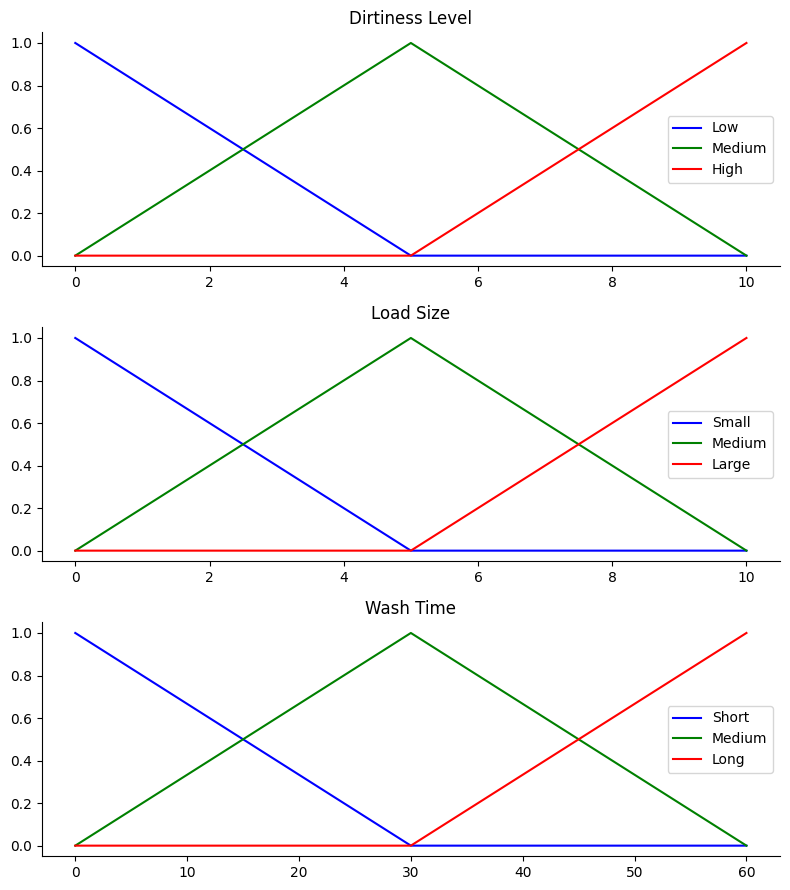

Recommended wash time: 32.260869565217405 minutes


d:\Diskrit\sklearn-env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


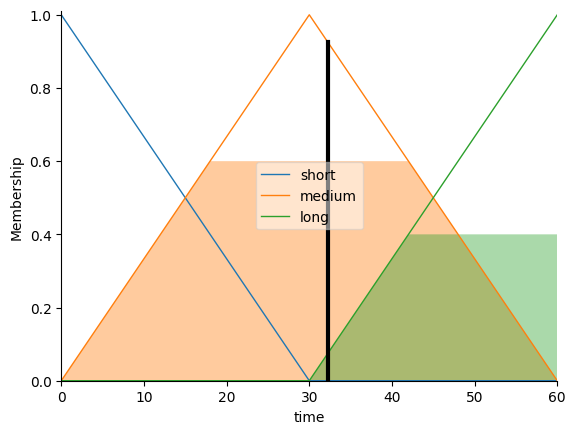

In [2]:
# Generate universe variables
#   * Dirtiness and load size on subjective ranges [0, 10]
#   * Wash time has a range of [0, 60] in units of minutes
x_dirtiness = np.arange(0, 11, 1)
x_load = np.arange(0, 11, 1)
x_time = np.arange(0, 61, 1)

# Generate fuzzy membership functions
dirtiness_low = fuzz.trimf(x_dirtiness, [0, 0, 5])
dirtiness_medium = fuzz.trimf(x_dirtiness, [0, 5, 10])
dirtiness_high = fuzz.trimf(x_dirtiness, [5, 10, 10])

load_small = fuzz.trimf(x_load, [0, 0, 5])
load_medium = fuzz.trimf(x_load, [0, 5, 10])
load_large = fuzz.trimf(x_load, [5, 10, 10])

time_short = fuzz.trimf(x_time, [0, 0, 30])
time_medium = fuzz.trimf(x_time, [0, 30, 60])
time_long = fuzz.trimf(x_time, [30, 60, 60])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_dirtiness, dirtiness_low, 'b', linewidth=1.5, label='Low')
ax0.plot(x_dirtiness, dirtiness_medium, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_dirtiness, dirtiness_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Dirtiness Level')
ax0.legend()

ax1.plot(x_load, load_small, 'b', linewidth=1.5, label='Small')
ax1.plot(x_load, load_medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_load, load_large, 'r', linewidth=1.5, label='Large')
ax1.set_title('Load Size')
ax1.legend()

ax2.plot(x_time, time_short, 'b', linewidth=1.5, label='Short')
ax2.plot(x_time, time_medium, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_time, time_long, 'r', linewidth=1.5, label='Long')
ax2.set_title('Wash Time')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

# Fuzzy logic system
dirtiness = ctrl.Antecedent(x_dirtiness, 'dirtiness')
load = ctrl.Antecedent(x_load, 'load')
time = ctrl.Consequent(x_time, 'time')

# Auto-membership function population is possible with .automf(3, 5, or 7)
dirtiness['low'] = dirtiness_low
dirtiness['medium'] = dirtiness_medium
dirtiness['high'] = dirtiness_high

load['small'] = load_small
load['medium'] = load_medium
load['large'] = load_large

time['short'] = time_short
time['medium'] = time_medium
time['long'] = time_long

# Define fuzzy rules
rule1 = ctrl.Rule(dirtiness['low'] & load['small'], time['short'])
rule2 = ctrl.Rule(dirtiness['low'] & load['medium'], time['short'])
rule3 = ctrl.Rule(dirtiness['low'] & load['large'], time['medium'])
rule4 = ctrl.Rule(dirtiness['medium'] & load['small'], time['short'])
rule5 = ctrl.Rule(dirtiness['medium'] & load['medium'], time['medium'])
rule6 = ctrl.Rule(dirtiness['medium'] & load['large'], time['medium'])
rule7 = ctrl.Rule(dirtiness['high'] & load['small'], time['medium'])
rule8 = ctrl.Rule(dirtiness['high'] & load['medium'], time['long'])
rule9 = ctrl.Rule(dirtiness['high'] & load['large'], time['long'])

# Control system creation and simulation
time_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
time_sim = ctrl.ControlSystemSimulation(time_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: If using .automf(3, 5, or 7) membership functions, use .view() to view the functions
time_sim.input['dirtiness'] = 7
time_sim.input['load'] = 8

# Crunch the numbers
time_sim.compute()

print(f"Recommended wash time: {time_sim.output['time']} minutes")

# Visualize result
time.view(sim=time_sim)